<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/%5B0916%5D_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np

In [ ]:




# -----------------------------
# 1) 데이터 준비
# -----------------------------

import pandas as pd

df = pd.read_csv("/content/sample_data/iris.data")
df  # print(df) 와 동일

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/iris.data", index_col=0)
df  # print(df) 와 동일

,3.5,1.4,0.2,Iris-setosa
5.1,,,,
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
# 결측치 확인
df.isnull().sum()

,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


In [ ]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
3.5,0
1.4,0
0.2,0
Iris-setosa,0


In [ ]:
df.columns

Index(['3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [ ]:
# 붓꽃 데이터를 불러옵니다.
iris = load_iris()
X = iris.data  # 피처(입력) 데이터
y = iris.target # 타겟(정답) 데이터

# 데이터를 훈련용과 테스트용으로 나눕니다.
# test_size=0.2: 20%를 테스트 데이터로 사용
# random_state: 재현 가능하도록 난수 시드 고정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. 분류 모델을 만들고 학습시킵니다.
# 바로 위에서 만들어진 X_train, y_train을 사용합니다.
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 0.0009000000000000015


데이터를 시각화하는 중입니다...


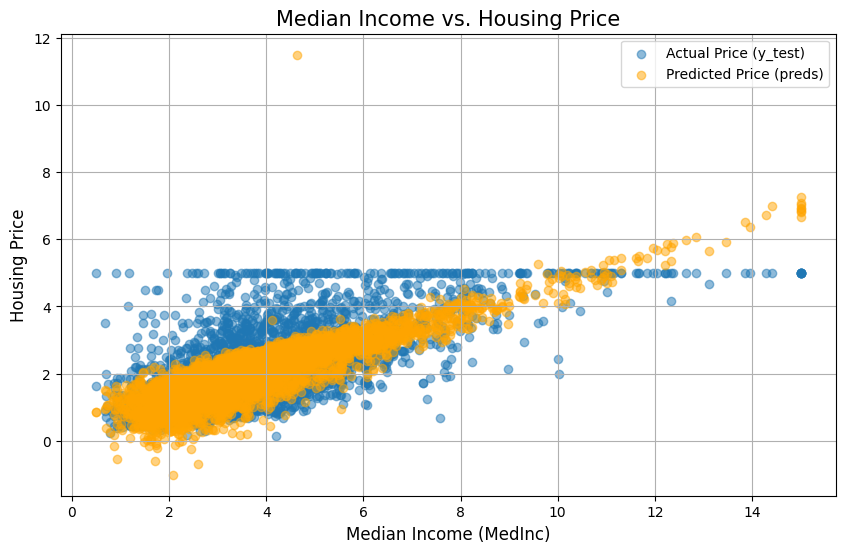


모델의 평균 제곱 오차 (MSE): 0.5559


In [ ]:
# 1. 필요한 모든 라이브러리를 가져옵니다.
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. 데이터를 불러오고 훈련/테스트용으로 나눕니다.
# 이 부분이 실행되어야 X_test, y_test 변수가 생성됩니다.
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델을 만들고 학습시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 4. 테스트 데이터로 예측을 수행합니다.
# <<<< 바로 이 라인이 실행되어야 'preds' 변수가 생성됩니다! >>>>
preds = model.predict(X_test)

# 5. 시각화를 위한 데이터를 준비합니다.
# 'MedInc' 피처는 데이터의 0번째 열입니다.
medinc_test = X_test[:, 0]

# 6. 결과를 시각화합니다.
# 이제 plt, y_test, preds 등 모든 변수가 준비되었습니다.
print("데이터를 시각화하는 중입니다...")
plt.figure(figsize=(10, 6))

# 실제값(y_test)을 파란색 점으로 표시
plt.scatter(medinc_test, y_test, label='Actual Price (y_test)', alpha=0.5)

# 모델의 예측값(preds)을 주황색 점으로 표시
plt.scatter(medinc_test, preds, color='orange', label='Predicted Price (preds)', alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('Median Income vs. Housing Price', fontsize=15)
plt.xlabel('Median Income (MedInc)', fontsize=12)
plt.ylabel('Housing Price', fontsize=12)
plt.legend()
plt.grid(True)

# 그래프를 화면에 보여줍니다.
plt.show()

# 7. 모델의 성능(MSE)도 함께 출력합니다.
mse = mean_squared_error(y_test, preds)
print(f"\n모델의 평균 제곱 오차 (MSE): {mse:.4f}")
